# Resizer in Software - Application Notebook

##### This reference design illustrates how to run a resize operation in **software** using Jupyter Notebooks and Python

<img src="./images/resizenb.png" width="800" height="650"/>

## Contents    
 
* [Image resize using PIL library](#Image-resize-using-PIL-library)   
* [Import libraries](#Import-libraries)
* [Create an Image object](#Create-an-Image-object)
* [Display the image to be resized](#Display-the-image-to-be-resized)
* [Resizing](#Resizing)
* [Display resized image](#Display-resized-image)
* [References](#References)


## Image resize using PIL library

>  PIL is the **Python Imaging Library**. This library provides extensive file format support, an efficient internal representation, and fairly powerful image processing capabilities.

> The Image module provides a class with the same name which is used to represent a PIL image. The module also provides a number of factory functions, including functions to load images from files, and to create new images.    

> https://pillow.readthedocs.io/en/5.2.x/reference/Image.html?highlight=Image.resize


## Import libraries

1. **PIL** library to load and resize the image   
2. **numpy** to store the pixel array of the image
3. **IPython.display** to show the image in the notebook 

In [1]:
from PIL import Image
import numpy as np
from IPython.display import display

## Create an Image object
We will load image from the SD card and create an Image object.

In [2]:
image_path = "images/paris.jpg"
original_image = Image.open(image_path)
original_image.load()

We now create a numpy array of the pixels.

In [3]:
input_array = np.array(original_image)

## Display the image to be resized

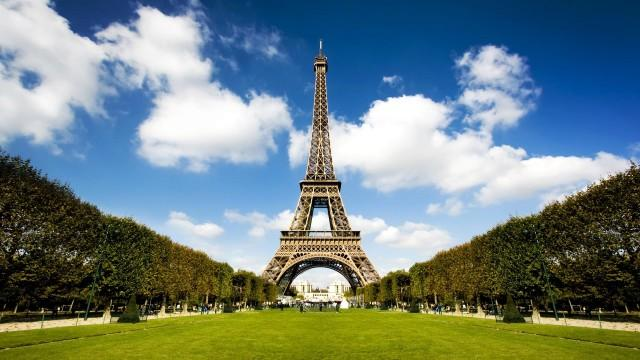

In [4]:
input_image = Image.fromarray(input_array)
display(input_image)

Let's double-check the original image size.

In [5]:
old_width, old_height = original_image.size
print("Image size: {}x{} pixels.".format(old_width, old_height))

Image size: 640x360 pixels.


## Resizing
We will set image resize dimensions.

In [6]:
resize_factor = 2
new_width = int(old_width/resize_factor)
new_height = int(old_height/resize_factor)

We will use `resize()` method from the PIL library.
We map multiple input pixels to a single output pixels to downscale the image   
The Python Imaging Library provides different resampling filters. We use the default: NEAREST   
Pick one nearest pixel from the input image. Ignore all other input pixels.

In [7]:
resized_image = original_image.resize((new_width, new_height))

## Display resized image

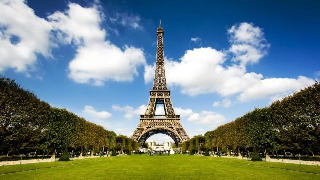

In [8]:
output_array = np.array(resized_image)
result = Image.fromarray(output_array)
display(result)

Let's check the resized image size.

In [9]:
width, height = resized_image.size
print("Resized image size: {}x{} pixels.".format(width, height))

Resized image size: 320x180 pixels.


We can time the resize in software operation.

In [10]:
%%timeit
resized_image = original_image.resize((new_width, new_height), Image.BILINEAR)

10 loops, best of 3: 24.6 ms per loop


[Contents](#Contents)

# References

https://pillow.readthedocs.io/en/3.1.x/index.html   
https://github.com/Xilinx/PYNQ/blob/master/docs/source/python_environment.ipynb   
https://github.com/Xilinx/PYNQ/blob/master/docs/source/jupyter_notebooks.ipynb   
https://github.com/Xilinx/PYNQ/blob/master/docs/source/jupyter_notebooks_advanced_features.ipynb   
https://pillow.readthedocs.io/en/latest/handbook/concepts.html#filters